In [1]:
import pandas as pd

GT = "CodeLlamaGroundTruth_cs1qa.csv"
FILES = {
    "all": "CS1QA_codeLlama_all.csv",
    "thirty": "CS1QA_codeLlama_thirty.csv",
    "sixty": "CS1QA_codeLlama_sixty.csv",
}

MEASURES = ["accuracy", "completeness", "relevance", "clarity"]
KEYS = ["code", "question"]

gt = pd.read_csv(GT)

for name, path in FILES.items():
    df = pd.read_csv(path)
    aligned = df.merge(gt, on=KEYS, how="left", suffixes=("_model", "_gt"))

    print(f"\n=== {name.upper()} ===")
    for m in MEASURES:
        mc = f"{m}_model"
        gc = f"{m}_gt"

        aligned[mc] = pd.to_numeric(aligned[mc], errors="coerce")
        aligned[gc] = pd.to_numeric(aligned[gc], errors="coerce")

        valid = aligned[gc].notna()
        acc = (aligned.loc[valid, mc] == aligned.loc[valid, gc]).mean()

        print(f"{m:>12}: {acc:.2%}")



=== ALL ===
    accuracy: 52.78%
completeness: 53.24%
   relevance: 45.83%
     clarity: 48.61%

=== THIRTY ===
    accuracy: 61.57%
completeness: 60.19%
   relevance: 62.96%
     clarity: 57.41%

=== SIXTY ===
    accuracy: 58.33%
completeness: 60.19%
   relevance: 56.94%
     clarity: 53.24%


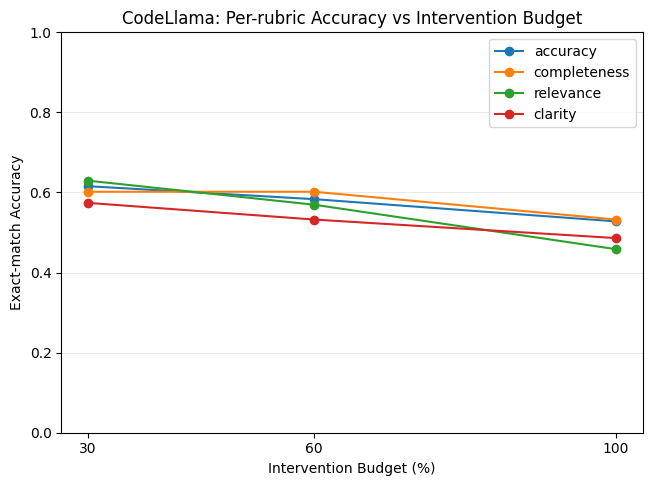

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# --------- FILE PATHS ----------
GT = "CodeLlamaGroundTruth_cs1qa.csv"

FILES = {
    30: "CS1QA_codeLlama_thirty.csv",
    60: "CS1QA_codeLlama_sixty.csv",
    100: "CS1QA_codeLlama_all.csv",
}

KEYS = ["code", "question"]
MEASURES = ["accuracy", "completeness", "relevance", "clarity"]

# --------- LOAD GROUND TRUTH ----------
gt = pd.read_csv(GT)

# --------- COMPUTE PER-RUBRIC ACCURACY ----------
x_vals = sorted(FILES.keys())
results = {m: [] for m in MEASURES}

for budget in x_vals:
    df = pd.read_csv(FILES[budget])
    aligned = df.merge(gt, on=KEYS, how="left", suffixes=("_model", "_gt"))

    for m in MEASURES:
        mc = f"{m}_model"
        gc = f"{m}_gt"

        aligned[mc] = pd.to_numeric(aligned[mc], errors="coerce")
        aligned[gc] = pd.to_numeric(aligned[gc], errors="coerce")

        valid = aligned[gc].notna()
        acc = (aligned.loc[valid, mc] == aligned.loc[valid, gc]).mean()
        results[m].append(acc)

# --------- PLOT (LINE CHART) ----------
plt.figure(figsize=(7.5, 5.2))

for m in MEASURES:
    plt.plot(x_vals, results[m], marker="o", label=m)

plt.xlabel("Intervention Budget (%)")
plt.ylabel("Exact-match Accuracy")
plt.title("CodeLlama: Per-rubric Accuracy vs Intervention Budget")
plt.ylim(0, 1)
plt.xticks(x_vals)
plt.legend()
plt.grid(True, axis="y", linewidth=0.5, alpha=0.4)

plt.show()
